#  Linear Regression
## Bike Sharing Assignment

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, **BoomBikes** aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

#### Business Goal:

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

##  Reading and Understanding the Data


In [1]:
# Supress Warnings and import necessary Libraries

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
bike=pd.read_csv('day.csv')

In [3]:
# Check the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Check the descriptive information
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Check the shape of the dataframe

print(bike.shape)

(730, 16)


### Observation : 
- Dataset has 730 rows and 16 columns.

- One column,*dteday* is of date type and all other are either float or integer type. 

- Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type.We will analyse and finalize whether to convert them to categorical or treat as integer.

# Data Preparation and EDA

## Check for NULL/MISSING values

In [7]:
# percentage of missing values in each column
round(100*(bike.isnull().sum()/len(bike)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [8]:
# row-wise null count percentage
round((bike.isnull().sum(axis=1)/len(bike))*100,2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

### Observation
- There are no missing / Null values either in columns or rows

## Duplicate Check

In [9]:
bike_dup = bike.copy()

# Checking for duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset=None, inplace=True)

In [10]:
bike_dup.shape

(730, 16)

In [11]:
bike.shape

(730, 16)

### Observation 

The shape after running the drop duplicate command is same as the original dataframe. Hence we can conclude that there were **zero duplicate** values in the dataset. 

## Data Cleaning

Checking value_counts() for entire dataframe. 

This will help to identify any Unknow/Junk values present in the dataset.

In [12]:
#Create a copy of the  dataframe, without the 'instant' column,
#as this will have unique values, and donot make sense to do a value count on it.

bike_dummy=bike.iloc[:,1:16]

In [13]:
for col in bike_dummy:
    print(bike_dummy[col].value_counts(ascending=False), '\n\n\n')

dteday
01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: count, Length: 730, dtype: int64 



season
3    188
2    184
1    180
4    178
Name: count, dtype: int64 



yr
0    365
1    365
Name: count, dtype: int64 



mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64 



holiday
0    709
1     21
Name: count, dtype: int64 



weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64 



workingday
1    499
0    231
Name: count, dtype: int64 



weathersit
1    463
2    246
3     21
Name: count, dtype: int64 



temp
26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: count, Length: 498, dtype: int64 



atemp
32.7

### Observation 
There seems to be no Junk/Unknown values in the entire dataset.

# Removing redundant & unwanted columns
Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

1. **instant** : Its only an index value

2. **dteday** : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we could live without this column. 

3.  **casual & registered** : Both these columns contains the count of bike booked by different categories of customers.
Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns.
More over, we have created a new variable to have the ratio of these customer types.

4.  We will save the new dataframe as bike_new, so that the original dataset is preserved for any future analysis/validation

In [14]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [15]:
bike_new=bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [16]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


# Creating Dummy Variables
We will create DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'. 
- Before creating dummy variables, we will have to convert them into 'category' data types.

In [17]:
# Check the datatypes before convertion
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [18]:
# Convert to 'category' data type

bike_new['season']=bike_new['season'].astype('category')
bike_new['weathersit']=bike_new['weathersit'].astype('category')
bike_new['mnth']=bike_new['mnth'].astype('category')
bike_new['weekday']=bike_new['weekday'].astype('category')

In [19]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [21]:
# This code does 3 things:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

bike_new = pd.get_dummies(bike_new, drop_first=True,dtype='uint8')
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [22]:
bike_new.shape

(730, 30)

## Splitting the Data
- Splitting the data to Train and Test: - We will now split the data into TRAIN and TEST (70:30 ratio) 
- We will use train_test_split method from sklearn package for this

In [23]:
# Check the shape before spliting

bike_new.shape

(730, 30)

In [24]:
# Check the info before spliting

bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [75]:
from sklearn.model_selection import train_test_split

# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(bike_new, train_size = 0.70, test_size = 0.30, random_state = 400)


- Verify the info and shape of the dataframes after split:

In [76]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 205 to 463
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null    uin

In [77]:
df_train.shape

(510, 30)

In [78]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 480 to 442
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   cnt           219 non-null    int64  
 8   season_2      219 non-null    uint8  
 9   season_3      219 non-null    uint8  
 10  season_4      219 non-null    uint8  
 11  mnth_2        219 non-null    uint8  
 12  mnth_3        219 non-null    uint8  
 13  mnth_4        219 non-null    uint8  
 14  mnth_5        219 non-null    uint8  
 15  mnth_6        219 non-null    uint8  
 16  mnth_7        219 non-null    uint8  
 17  mnth_8        219 non-null    uint8  
 18  mnth_9        219 non-null    uin

In [79]:
df_test.shape

(219, 30)

# Exploratory Data Analysis (EDA)

- We need to  perform the EDA on TRAINING (df_train) Dataset.

## Visualising Numeric Variables
Let's make a pairplot of all the numeric variables.

In [80]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 205 to 463
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null    uin

In [81]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

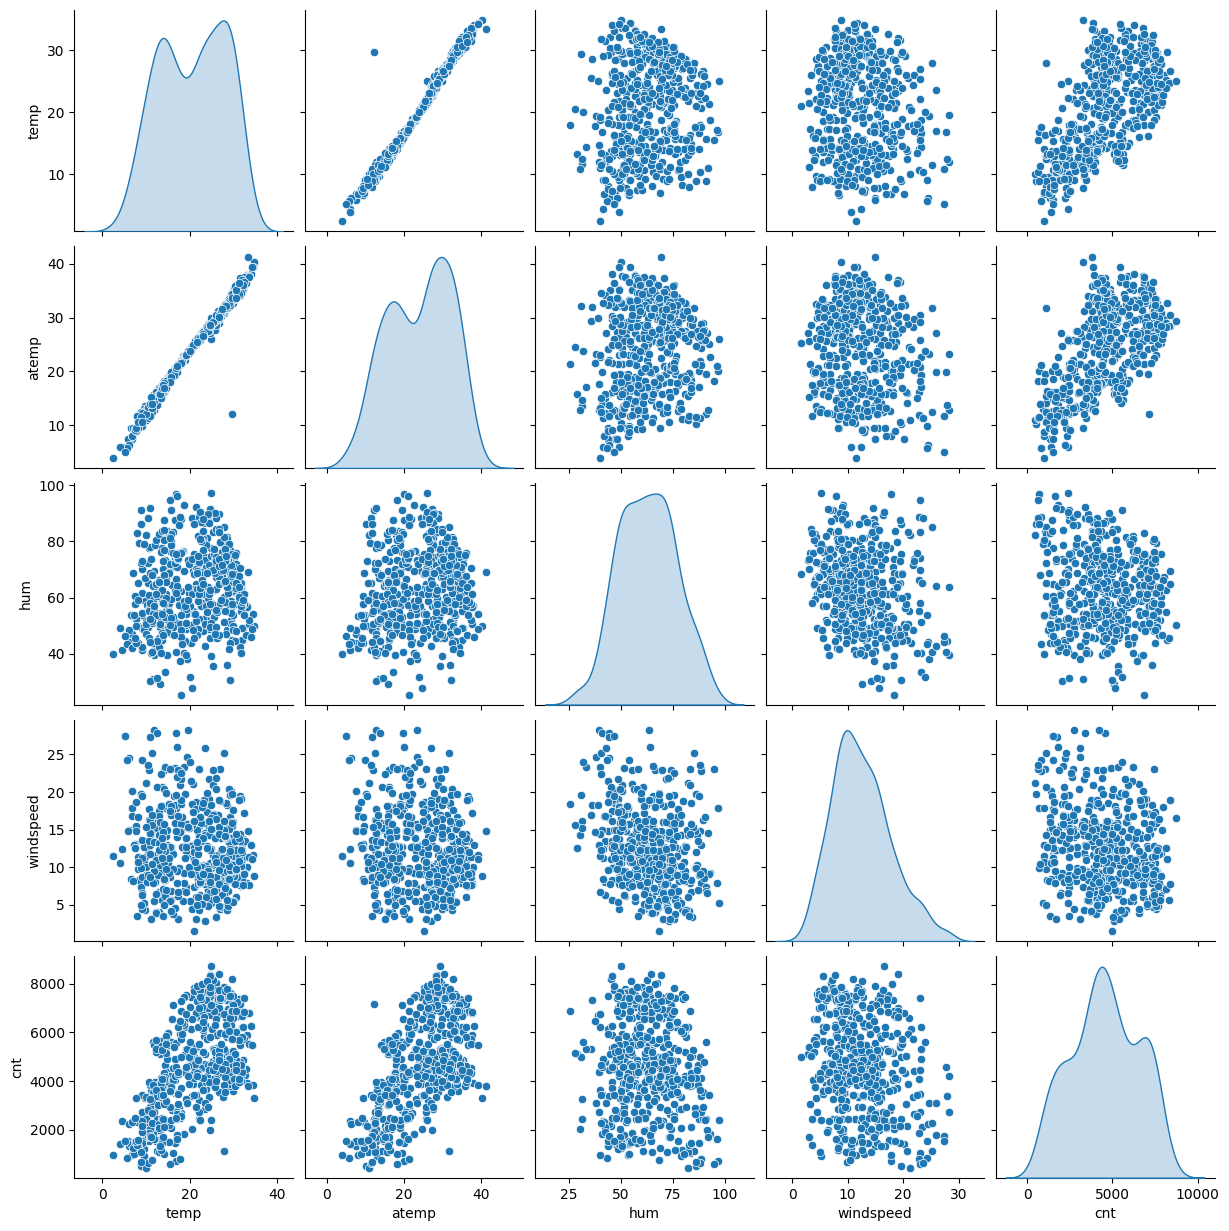

In [82]:
# Create a new dataframe of only numeric variables:

bike_num=df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

### Observation
- The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt' 

## Visualising Catagorical Variables

In [83]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 205 to 463
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null    uin

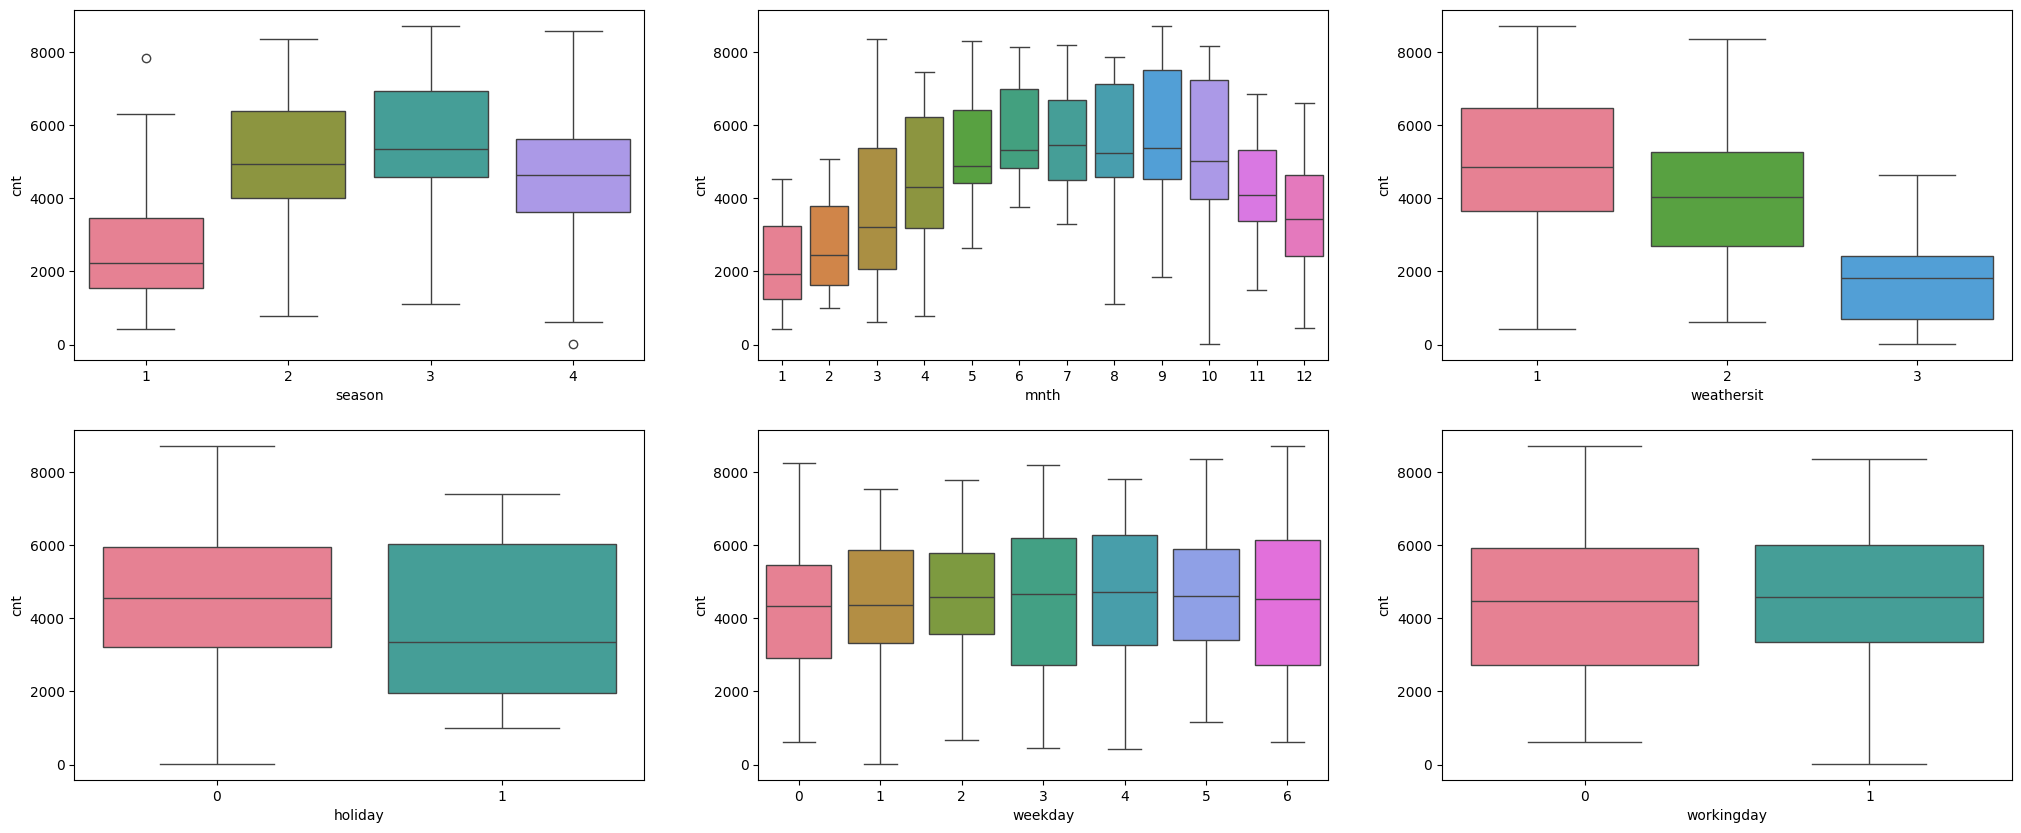

In [84]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike, palette ='husl')
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike, palette ='husl')
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike, palette ='husl')
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike, palette ='husl')
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike, palette ='husl')
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike, palette ='husl')
plt.show()

### Observation
There were 6 categorical variables in the dataset. 

We used Box plot (refer the fig above) to study their effect on the dependent variable (‘cnt’) . 

The inference that we could derive were: 
- **season**: Almost 32% of the bike booking were happening in season3 with a median of over 5000 booking (for the period of 2 years). This was followed by season2 & season4 with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable.

- **mnth**: Almost 10% of the bike booking were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable. 
- **weathersit**: Almost 67% of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking (for the period of 2 years). This was followed by weathersit2 with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.
- **holiday**: Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable. 
- **weekday**: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not.
- **workingday**: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

## Correlation Matrix

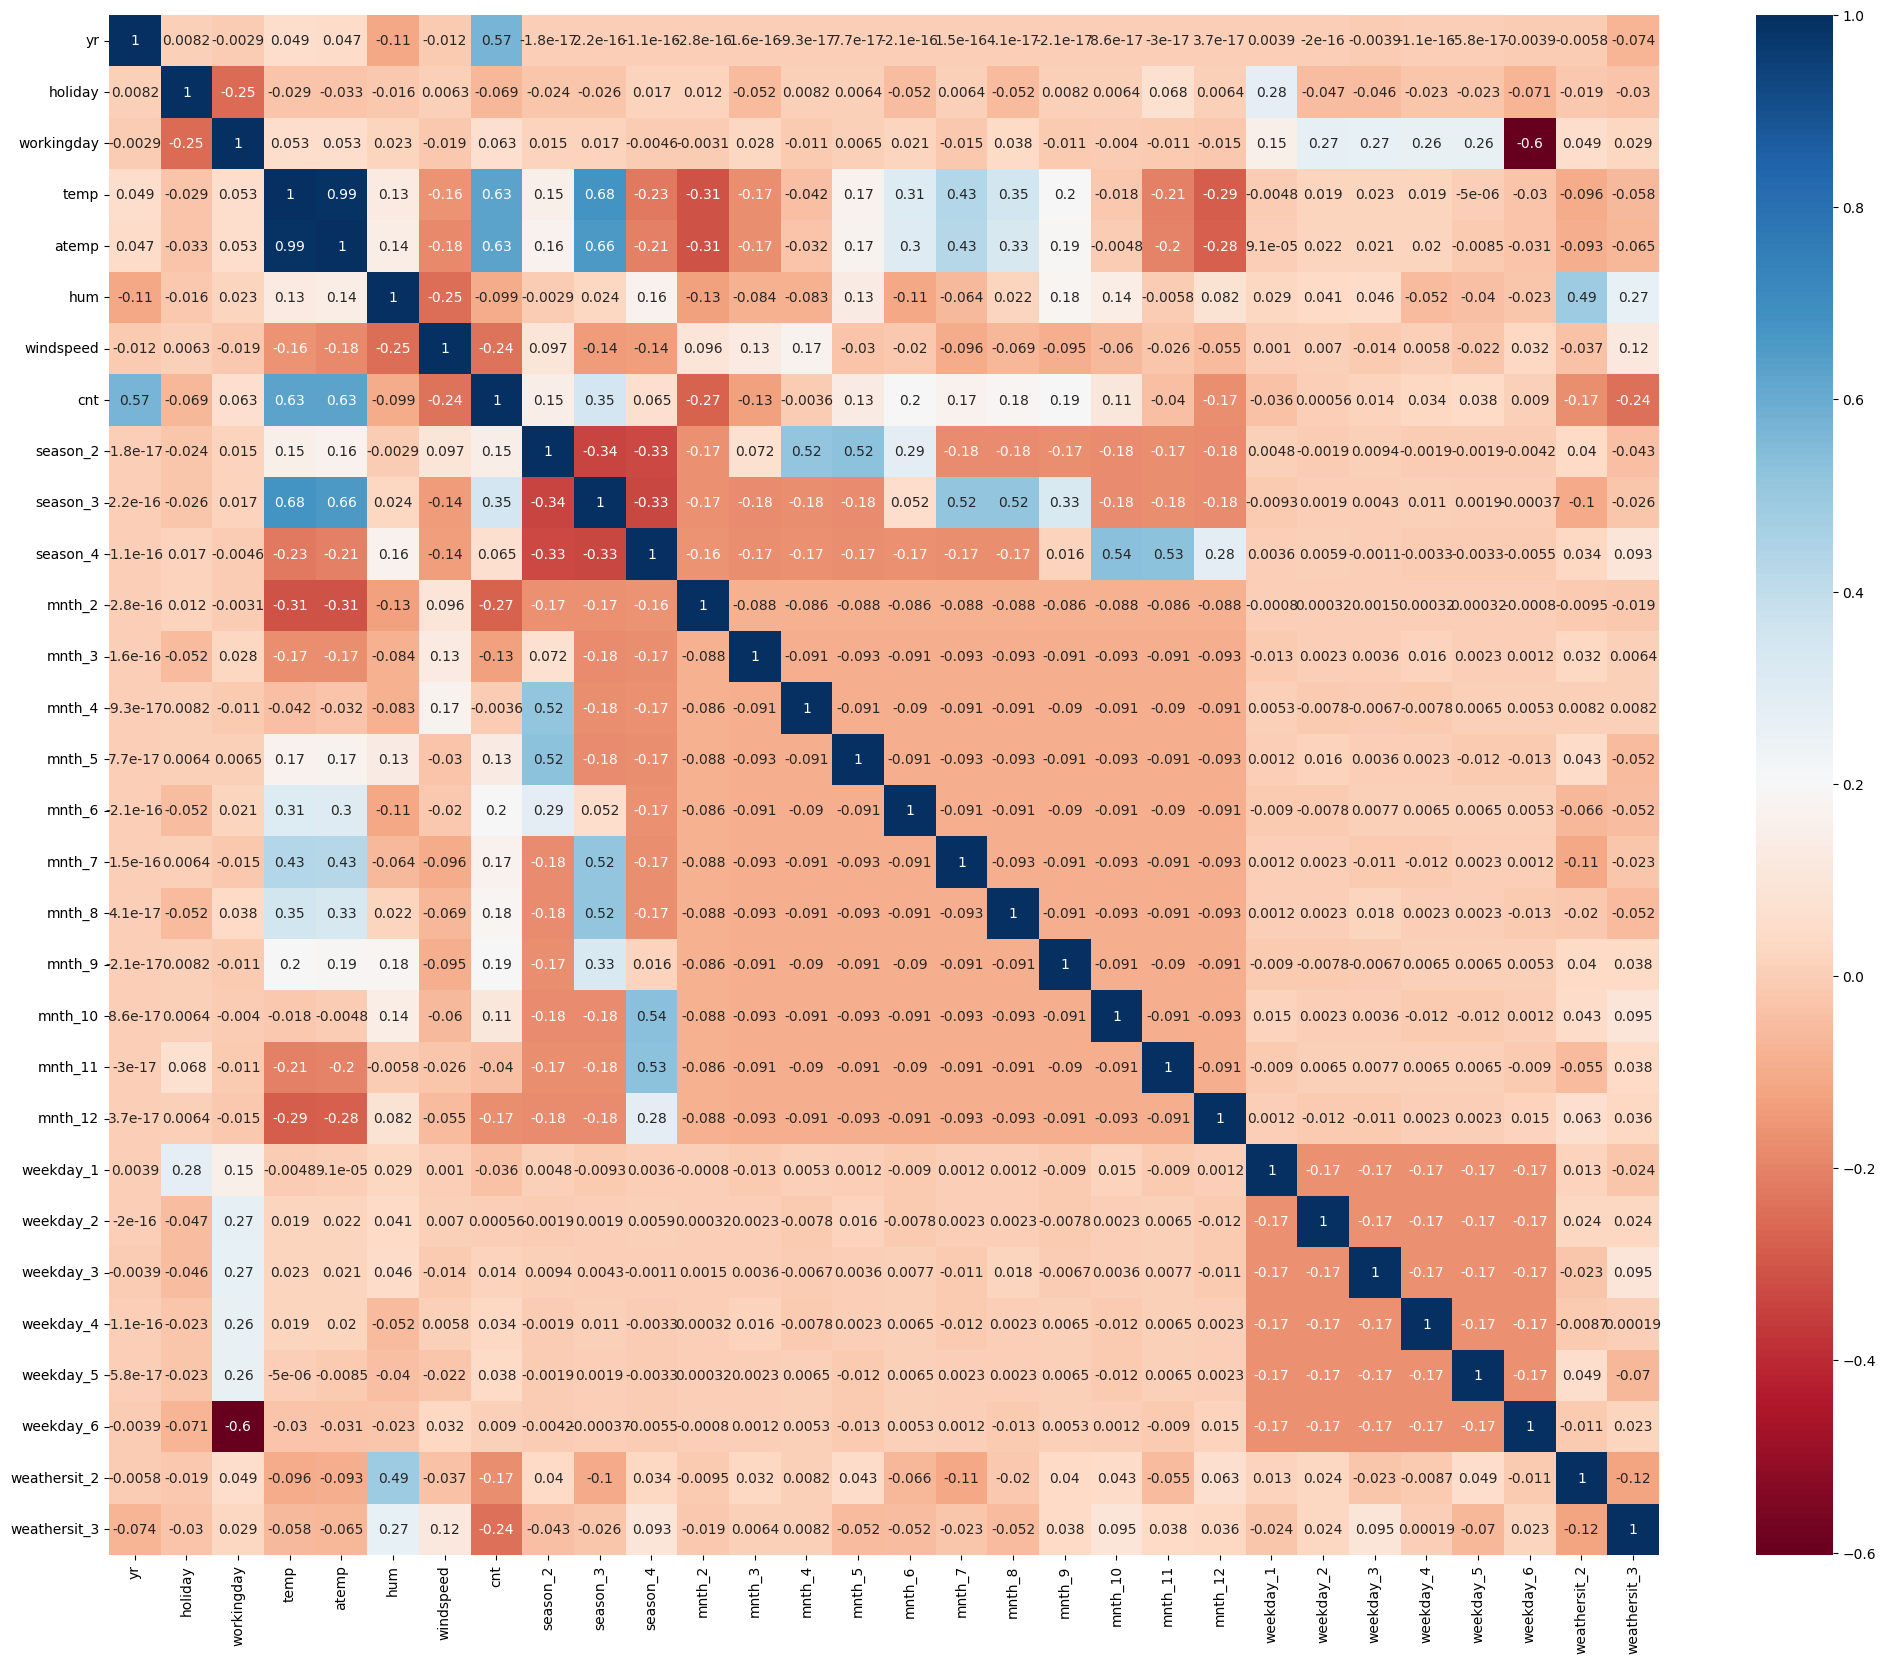

In [85]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here we are considering only those variables (dataframe: bike_new) that were chosen for analysis

plt.figure(figsize = (25,20))
sns.heatmap(bike_new.corr(), annot = True, cmap="RdBu")
plt.show()

### Observation:
 - The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
 - We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

# Rescaling the features

In [86]:
from sklearn.preprocessing import MinMaxScaler

In [87]:
scaler = MinMaxScaler()

In [88]:
# Checking the values before scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
205,0,0,1,30.476653,36.04790,75.7083,6.084156,3840,0,1,...,0,0,1,0,0,0,0,0,0,0
351,0,0,0,9.771653,12.27895,58.6250,11.375193,2431,0,0,...,0,1,0,0,0,0,0,0,0,0
660,1,0,1,22.310847,26.51520,64.1667,6.334569,7466,0,0,...,0,0,0,1,0,0,0,0,0,0
265,0,0,1,24.975847,26.10625,97.2500,5.250569,2395,0,0,...,0,0,0,0,0,0,1,0,1,0
27,0,0,1,8.342598,11.16585,79.3043,8.261100,1167,0,0,...,0,0,0,0,0,0,1,0,1,0


In [89]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [90]:
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [91]:
# Checking values after scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
205,0,0,1,0.866039,0.858942,0.700115,0.171091,0.410855,0,1,...,0,0,1,0,0,0,0,0,0,0
351,0,0,0,0.226828,0.222814,0.462297,0.368576,0.240542,0,0,...,0,1,0,0,0,0,0,0,0,0
660,1,0,1,0.613942,0.603818,0.539443,0.180438,0.849148,0,0,...,0,0,0,1,0,0,0,0,0,0
265,0,0,1,0.696217,0.592874,1.000000,0.139978,0.236190,0,0,...,0,0,0,0,0,0,1,0,1,0
27,0,0,1,0.182710,0.193024,0.750176,0.252344,0.087755,0,0,...,0,0,0,0,0,0,1,0,1,0


In [92]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.496078,0.027451,0.676471,0.560142,0.536332,0.522236,0.412854,0.496619,0.258824,0.270588,...,0.072549,0.086275,0.145098,0.147059,0.147059,0.133333,0.131373,0.149020,0.325490,0.031373
std,0.500476,0.163554,0.468282,0.234067,0.220194,0.194264,0.195516,0.237551,0.438419,0.444700,...,0.259649,0.281045,0.352545,0.354512,0.354512,0.340268,0.338139,0.356457,0.469018,0.174494
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.357625,0.349512,0.370069,0.272165,0.334129,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.584407,0.571714,0.519142,0.390337,0.495467,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.761350,0.716403,0.663863,0.529178,0.694458,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# MODEL Building : Linear Model

In [93]:
## Dividing into X and Y sets for the model building
y_train = df_train.pop('cnt')
X_train = df_train

### RFE
Recursive feature elimination: We will be using the **LinearRegression function from SciKit Learn**  for its compatibility with RFE (which is a utility from sklearn)

In [94]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [95]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=15)            # running RFE
rfe = rfe.fit(X_train, y_train)

In [96]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 9),
 ('mnth_3', False, 2),
 ('mnth_4', False, 7),
 ('mnth_5', False, 4),
 ('mnth_6', False, 6),
 ('mnth_7', False, 11),
 ('mnth_8', False, 3),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 5),
 ('mnth_12', False, 13),
 ('weekday_1', False, 12),
 ('weekday_2', False, 14),
 ('weekday_3', False, 15),
 ('weekday_4', False, 10),
 ('weekday_5', False, 8),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [97]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_2', 'season_3', 'season_4', 'mnth_9', 'mnth_10', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [98]:
X_train.columns[~rfe.support_]

Index(['mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5'],
      dtype='object')

In [99]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Building Linear Model using **STATS MODEL**
## Model 1
### VIF Check

In [100]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,382.50
4,atemp,367.11
5,hum,11.74
8,season_3,7.21
2,workingday,4.91
6,windspeed,4.35
7,season_2,3.86
9,season_4,2.79
13,weathersit_2,2.25
0,yr,1.96


In [102]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [103]:
# Check the parameters obtained

lr1.params

const           0.108810
yr              0.248739
holiday        -0.046041
workingday      0.047342
temp            0.410726
atemp           0.083499
hum            -0.133262
windspeed      -0.146818
season_2        0.133447
season_3        0.073599
season_4        0.144832
mnth_9          0.098777
mnth_10         0.076591
weekday_6       0.063463
weathersit_2   -0.049725
weathersit_3   -0.220079
dtype: float64

In [104]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     182.6
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          2.27e-190
Time:                        18:43:16   Log-Likelihood:                 488.90
No. Observations:                 510   AIC:                            -945.8
Df Residuals:                     494   BIC:                            -878.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1088      0.025      4.426   

## Model 2
- Removing the variable 'atemp' based on its High p-value & High VIF
### VIF Check

In [105]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [106]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,23.54
4,hum,11.42
7,season_3,7.17
2,workingday,4.90
5,windspeed,4.27
6,season_2,3.86
8,season_4,2.79
12,weathersit_2,2.24
0,yr,1.96
11,weekday_6,1.84


In [107]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [108]:
# Check the parameters obtained

lr2.params

const           0.110271
yr              0.248600
holiday        -0.046688
workingday      0.047290
temp            0.488990
hum            -0.131769
windspeed      -0.149273
season_2        0.133807
season_3        0.072801
season_4        0.145186
mnth_9          0.098768
mnth_10         0.076710
weekday_6       0.063544
weathersit_2   -0.050025
weathersit_3   -0.221523
dtype: float64

In [114]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Fri, 20 Sep 2024   Prob (F-statistic):          8.74e-182
Time:                        23:41:53   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1760      0.030      5.798   

## Model 3
 - Removing the variable 'hum' based on its Very High 'VIF' value.
 - Even though the VIF of hum is second highest, we decided to drop 'hum' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.

In [109]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

### VIF Check

In [110]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,17.90
6,season_3,6.85
2,workingday,4.71
4,windspeed,4.25
5,season_2,3.82
7,season_4,2.73
0,yr,1.96
10,weekday_6,1.80
9,mnth_10,1.67
11,weathersit_2,1.49


In [111]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [118]:
lr3.params

const           0.089989
yr              0.235928
holiday        -0.039321
workingday      0.046007
temp            0.400925
windspeed      -0.159259
season_2        0.082410
season_3        0.052699
season_4        0.154550
mnth_2          0.036255
mnth_3          0.074876
mnth_4          0.081575
mnth_5          0.098739
mnth_6          0.085930
mnth_7          0.044819
mnth_8          0.092675
mnth_9          0.150747
mnth_10         0.072118
mnth_11         0.022961
mnth_12         0.013894
weekday_1      -0.010698
weekday_2      -0.007422
weekday_3       0.006274
weekday_4       0.004329
weekday_5       0.014203
weekday_6       0.059111
weathersit_2   -0.084588
weathersit_3   -0.298659
dtype: float64

In [112]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.4
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          1.01e-188
Time:                        18:47:41   Log-Likelihood:                 479.46
No. Observations:                 510   AIC:                            -930.9
Df Residuals:                     496   BIC:                            -871.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0506      0.020      2.478   

## Model 4
- Removing the variable 'season3' based on its Very High 'VIF' value.
- Even though the VIF of season3 is second highest, we decided to drop 'season3' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.

In [113]:
X_train_new = X_train_new.drop(["season_3"], axis = 1)

### VIF Check


In [114]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,5.31
2,workingday,4.64
4,windspeed,4.09
6,season_4,1.96
0,yr,1.94
9,weekday_6,1.80
8,mnth_10,1.63
5,season_2,1.60
10,weathersit_2,1.49
7,mnth_9,1.22


In [115]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [116]:
# Check the parameters obtained

lr4.params

const           0.034515
yr              0.253110
holiday        -0.043677
workingday      0.049392
temp            0.562181
windspeed      -0.123985
season_2        0.089719
season_4        0.116371
mnth_9          0.098005
mnth_10         0.061670
weekday_6       0.070930
weathersit_2   -0.076109
weathersit_3   -0.275249
dtype: float64

In [117]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          8.50e-187
Time:                        18:49:01   Log-Likelihood:                 472.09
No. Observations:                 510   AIC:                            -918.2
Df Residuals:                     497   BIC:                            -863.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0345      0.020      1.704   

## Model 5
- Removing the variable 'holiday' based on its Very High p-value.

In [118]:
X_train_new = X_train_new.drop(["holiday"], axis = 1)

In [119]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.14
1,workingday,4.24
3,windspeed,4.00
5,season_4,1.95
0,yr,1.94
8,weekday_6,1.72
7,mnth_10,1.63
4,season_2,1.60
9,weathersit_2,1.48
6,mnth_9,1.22


In [120]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [121]:
# Check the parameters obtained

lr5.params

const           0.027135
yr              0.253498
workingday      0.056245
temp            0.562314
windspeed      -0.123470
season_2        0.090643
season_4        0.116710
mnth_9          0.097330
mnth_10         0.060602
weekday_6       0.077744
weathersit_2   -0.076538
weathersit_3   -0.274723
dtype: float64

In [122]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.7
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          1.77e-187
Time:                        18:52:37   Log-Likelihood:                 470.88
No. Observations:                 510   AIC:                            -917.8
Df Residuals:                     498   BIC:                            -866.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0271      0.020      1.377   

## Model 6
- Removing the variable 'mnth_10' based on its High 'p-value'.

In [123]:
X_train_new = X_train_new.drop(["mnth_10"], axis = 1)

### VIF Check

In [124]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.03
1,workingday,4.23
3,windspeed,3.98
0,yr,1.94
7,weekday_6,1.71
4,season_2,1.60
8,weathersit_2,1.48
5,season_4,1.39
6,mnth_9,1.19
9,weathersit_3,1.09


In [125]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [126]:
# Check the parameters obtained

lr6.params

const           0.022117
yr              0.254088
workingday      0.055668
temp            0.572871
windspeed      -0.124763
season_2        0.089211
season_4        0.139166
mnth_9          0.089671
weekday_6       0.077505
weathersit_2   -0.075355
weathersit_3   -0.266990
dtype: float64

In [127]:
# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.2
Date:                Sat, 21 Sep 2024   Prob (F-statistic):          1.66e-186
Time:                        18:56:35   Log-Likelihood:                 465.72
No. Observations:                 510   AIC:                            -909.4
Df Residuals:                     499   BIC:                            -862.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0221      0.020      1.116   

### Observation
- This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

# Final Model Interpretation

## Hypothesis Testing:
Hypothesis testing states that:
- H0:B1=B2=...=Bn=0 
- H1:  at least one  Bi!=0

### lr6 model coefficient values
- const          = 0.022117
- yr             = 0.254088
- workingday     = 0.055668
- temp           = 0.572871
- windspeed      =-0.124763
- season_2       = 0.089211
- season_4       = 0.139166
- mnth_9         = 0.089671
- weekday_6      = 0.077505
- weathersit_2   =-0.075355
- weathersit_3   =-0.266990

### Observation 
- From the lr6 model summary, it is evident that all our coefficients are not equal to zero which means **We REJECT the NULL HYPOTHESIS**

### F Statistics
F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

- F-statistic: 248.2
- Prob (F-statistic): 1.66e-186

The F-Statistics value of 248.2 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

## The equation of best fitted surface based on model lr6:


**cnt** = 0.0221  + (**yr** × 0.2541) + (**workingday** × 0.0557) + (**temp** × 0.5729) − (**windspeed** × 0.1248) + (**season2** × 0.0892) + (**season4** × 0.1392) + (**mnth9** × 0.0897) + (**weekday6** × 0.0775) − (**weathersit2** × 0.0754) − (**weathersit3** × 0.2670)

 

## Interpretation of Coefficients:
**temp:** A coefficient value of ‘0.5729’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.5729 units.

**weathersit_3:** A coefficient value of ‘-0.2670’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable, decreases the bike hire numbers by 0.2670 units.

**yr:** A coefficient value of ‘0.2541’ indicated that a unit increase in yr variable, increases the bike hire numbers by 0.2541 units.

**season_4:** A coefficient value of ‘0.1392’ indicated that w.r.t season_1, a unit increase in season_4 variable increases the bike hire numbers by 0.1392 units.

**windspeed:** A coefficient value of ‘-0.1248’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.1248 units.

**workingday:** A coefficient value of ‘0.0557’ indicated that, a unit increase in workingday variable increases the bike hire numbers by 0.0557 units.

**season_2:** A coefficient value of ‘0.0892’ indicated that w.r.t season_1, a unit increase in season_2 variable decreases the bike hire numbers by 0.0892 units.

**mnth_9:** A coefficient value of ‘0.0897’ indicated that w.r.t mnth_1, a unit increase in mnth_9 variable increases the bike hire numbers by 0.0897 units.

**weekday_6:** A coefficient value of ‘0.0775’ indicated that w.r.t weekday_1, a unit increase in weekday_6 variable increases the bike hire numbers by 0.0775 units.

**weathersit_2:** A coefficient value of ‘-0.0754’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit2 variable, decreases the bike hire numbers by 0.0754 units.

**const:** The Constant value of ‘0.0221’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.0221 units.

# Assumptions 

## Error terms are normally distributed with mean zero (not X, Y)
- Residual Analysis Of Training Data

In [128]:
y_train_pred = lr6.predict(X_train_lm6)

Text(0.5, 0, 'Errors')

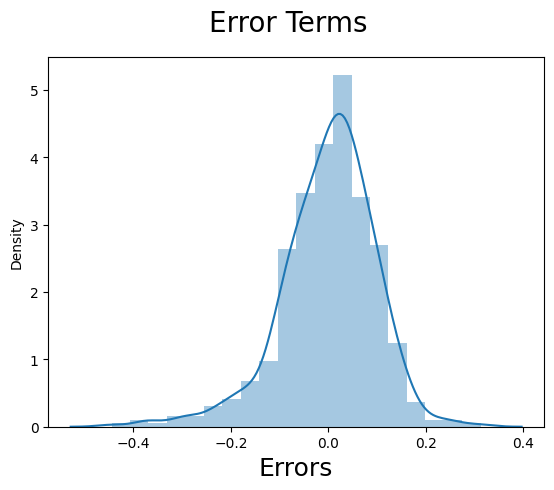

In [129]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Observation
- From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

## There is No Multicollinearity between the predictor variables

In [130]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.03
1,workingday,4.23
3,windspeed,3.98
0,yr,1.94
7,weekday_6,1.71
4,season_2,1.60
8,weathersit_2,1.48
5,season_4,1.39
6,mnth_9,1.19
9,weathersit_3,1.09


## Observation

 - From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5 except **temp**

#  Prediction Using Final Model (lr6)

Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr6)

### Applying the scaling on the test sets

In [131]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [132]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
480,1,0,1,0.555927,0.541299,0.699536,0.385696,0.554212,1,0,...,0,0,0,0,0,1,0,0,1,0
324,0,0,1,0.491584,0.489752,0.912993,0.289240,0.280914,0,0,...,1,0,1,0,0,0,0,0,0,1
79,0,0,1,0.469984,0.442479,0.672702,0.666173,0.197752,1,0,...,0,0,1,0,0,0,0,0,1,0
465,1,0,1,0.366522,0.345516,0.299858,0.682405,0.534389,1,0,...,0,0,0,0,1,0,0,0,0,0
274,0,0,0,0.376611,0.356278,0.748260,0.499199,0.299408,0,0,...,0,0,0,0,0,0,0,0,1,0


In [133]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.511416,0.031963,0.698630,0.534984,0.512905,0.514528,0.437081,0.480352,0.237443,0.228311,...,0.105023,0.077626,0.141553,0.132420,0.127854,0.159817,0.168950,0.132420,0.360731,0.022831
std,0.501015,0.176306,0.459904,0.226267,0.213266,0.207876,0.189548,0.226151,0.426491,0.420705,...,0.307285,0.268194,0.349389,0.339723,0.334692,0.367276,0.375566,0.339723,0.481313,0.149707
min,0.000000,0.000000,0.000000,0.047329,0.026455,-0.353829,0.060663,-0.050647,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.333892,0.330516,0.372049,0.310258,0.325456,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.511625,0.505788,0.513341,0.409015,0.499698,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.729970,0.689998,0.661253,0.523308,0.619364,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.015822,1.019437,0.968097,1.213032,0.980781,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [134]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 480 to 442
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    uint8  
 8   season_3      219 non-null    uint8  
 9   season_4      219 non-null    uint8  
 10  mnth_2        219 non-null    uint8  
 11  mnth_3        219 non-null    uint8  
 12  mnth_4        219 non-null    uint8  
 13  mnth_5        219 non-null    uint8  
 14  mnth_6        219 non-null    uint8  
 15  mnth_7        219 non-null    uint8  
 16  mnth_8        219 non-null    uint8  
 17  mnth_9        219 non-null    uint8  
 18  mnth_10       219 non-null    uin

In [135]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 480 to 442
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   windspeed     219 non-null    float64
 5   season_2      219 non-null    uint8  
 6   season_4      219 non-null    uint8  
 7   mnth_9        219 non-null    uint8  
 8   weekday_6     219 non-null    uint8  
 9   weathersit_2  219 non-null    uint8  
 10  weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.5 KB


In [136]:
# Making predictions using the final model (lr6)

y_pred = lr6.predict(X_test_lm6)

# MODEL EVALUATION

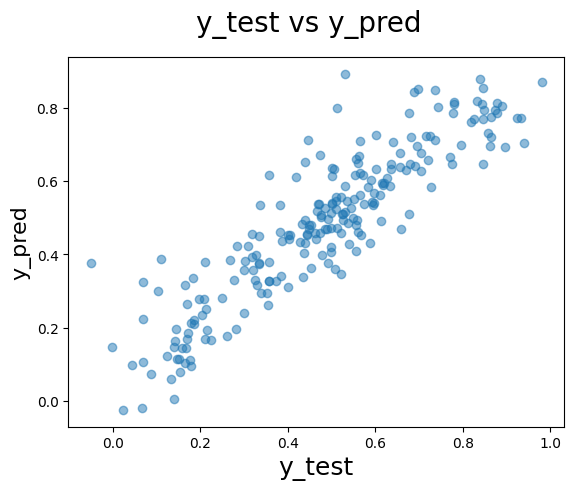

In [137]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

 # R^2 Value for TEST

In [138]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.800648059280461

## Adjusted R^2 Value for TEST

In [139]:
# We already have the value of R^2 (calculated in above step)
r2=0.800648059280461

In [140]:
# Get the shape of X_test
X_test.shape

(219, 10)

In [141]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7910638313612524

# Final Result Comparison
- Train R^2 :0.833
- Train Adjusted R^2 :0.829 
- Test R^2 :0.801
- Test Adjusted R^2 :0.791
- This seems to be a really good model that can very well 'Generalize' various datasets.

# Conclusion

As per our final Model, the top 3 predictor variables that influences the bike booking are: 
- **Temperature (temp)** - A coefficient value of ‘0.5729’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.5729 units. 
- **Weather Situation 3 (weathersit_3)** - A coefficient value of ‘-0.2670’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable decreases the bike hire numbers by 0.2670 units.
- **Year (yr)** - A coefficient value of ‘0.2541’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2541 units. 

#### So, it's suggested to consider these variables utmost importance while planning, to achive maximum Booking

The next best features that can also be considered are 
- **season_4:** - A coefficient value of ‘0.1392’ indicated that w.r.t season_1, a unit increase in season_4 variable increases the bike hire numbers by 0.1392 units. 
- **windspeed:** - A coefficient value of ‘-0.1248’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.1248 units. 

 #### NOTE: 
 - The details of weathersit_1 & weathersit_3 
 - **weathersit_1:** Clear, Few clouds, Partly cloudy, Partly cloudy
 - **weathersit_3:** Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
 
 
 The details of season1 & season4 
 - **season1:** spring 
 - **season4:** winter